In [1]:
import tensorflow as tf 
from tensorflow.keras import  Sequential 
from tensorflow.keras.layers import  Dense 
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import  StandardScaler 
from sklearn.model_selection import train_test_split 

import numpy as np 
import matplotlib.pyplot as plt

import pandas as pd

In [43]:
# 1️⃣ Load dataset
data=fetch_california_housing()

data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [42]:
# 2️⃣ Split into training and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



(16512, 8)

In [35]:
# 3️⃣ Scale the features
from sklearn.preprocessing import  StandardScaler 
scalar=StandardScaler()

X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)

X_test_scaled


array([[-1.15508475, -0.28632369, -0.52068576, ...,  0.06740798,
         0.1951    ,  0.28534728],
       [-0.70865905,  0.11043502, -0.16581537, ..., -0.03602975,
        -0.23549054,  0.06097472],
       [-0.21040155,  1.85617335, -0.61076476, ..., -0.14998876,
         1.00947776, -1.42487026],
       ...,
       [ 2.80902421, -0.28632369,  0.75501156, ..., -0.02646898,
         0.78014149, -1.23041404],
       [-0.57542978,  0.58654547, -0.06124296, ..., -0.04390537,
         0.52740357, -0.08860699],
       [-0.17259111, -0.92113763, -0.6058703 , ...,  0.05466644,
        -0.66608108,  0.60445493]])

In [36]:
# 4️⃣ Build the neural network model

model=Sequential([
    Dense(units=64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(units=32,activation='relu'),
    Dense(units=1,activation='linear')
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
#4128 8 * 8 64
#4128 64 * 64 32
#4128 32 * 32 1

# Compile the model

from tensorflow.keras.losses import  MeanSquaredError


model.compile(optimizer='adam',loss=MeanSquaredError(), metrics=['mae'])



In [38]:
# 5️⃣ Train the model

history=model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2,verbose=1)

Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - loss: 1.7139 - mae: 0.9270 - val_loss: 0.5033 - val_mae: 0.5054
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.4303 - mae: 0.4703 - val_loss: 0.4190 - val_mae: 0.4647
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 0.3736 - mae: 0.4312 - val_loss: 0.3963 - val_mae: 0.4522
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.3758 - mae: 0.4328 - val_loss: 0.3799 - val_mae: 0.4273
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.3397 - mae: 0.4134 - val_loss: 0.3738 - val_mae: 0.4417
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.3248 - mae: 0.4062 - val_loss: 0.3641 - val_mae: 0.4148
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.3332 - mae: 0.4049 - val_loss: 0.3511 - val_mae: 0.4123
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.3281 - mae: 0.3971 - val_loss: 0.3496 - val_mae: 0.4055
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 

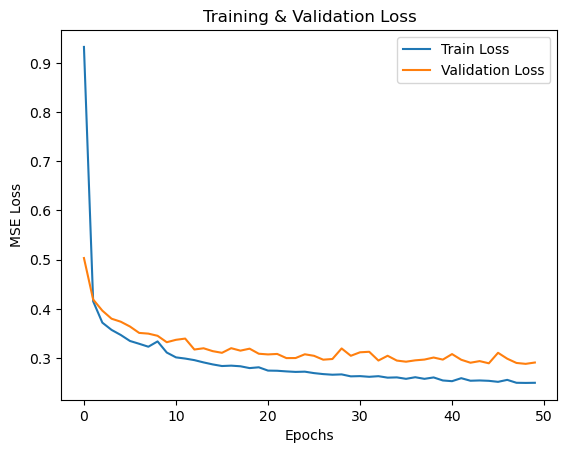

In [39]:


# 6️⃣ Plot the loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step


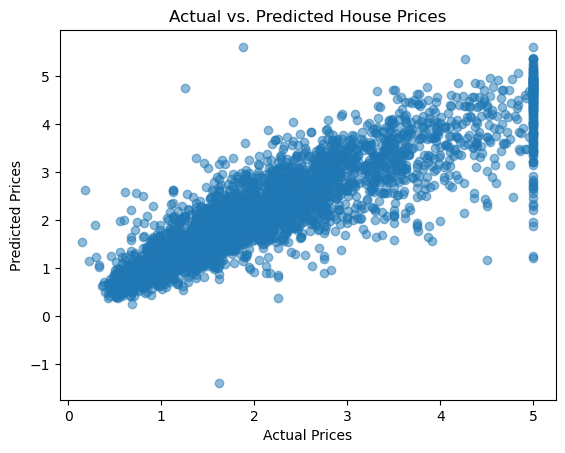

In [40]:
# Predict prices on test set
y_pred = model.predict(X_test_scaled)

# Compare actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

In [41]:
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Test MAE: {mae:.2f}, Test MSE: {loss:.2f}")


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - loss: 0.2739 - mae: 0.3666
Test MAE: 0.37, Test MSE: 0.28
